# Exploring Dandiset 001349: From Initial Formation to Developmental Refinement: GABAergic Inputs Shape Neuronal Subnetworks in the Primary Somatosensory Cortex

**Note:** This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results and verify findings independently.

## Overview

This Dandiset contains two-photon calcium imaging data acquired in the primary somatosensory cortex of developing mice (postnatal days P11–P21). The dataset includes synchronized behavioral video recordings, with imaging and behavior synchronized using LED signals. The data is stored in Neurodata Without Borders (NWB) format and includes processed fluorescence traces, calcium events, and ROI segmentation data.

**Dandiset Link:** https://dandiarchive.org/dandiset/001349/0.250520.1729

**Key Details:**
- **Species:** Mus musculus (House mouse)
- **Modalities:** Two-photon calcium imaging, synchronized behavioral video
- **Number of subjects:** 32
- **Number of files:** 361
- **Total size:** ~9 GB

## Required Packages

This notebook assumes the following packages are installed:
- `dandi`
- `pynwb` 
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `pandas`

In [1]:
# Import necessary packages
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Explore Dandiset Metadata

In [2]:
# Connect to DANDI and get dandiset information
client = DandiAPIClient()
dandiset = client.get_dandiset("001349", "0.250520.1729")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")

Dandiset name: From Initial Formation to Developmental Refinement: GABAergic Inputs Shape Neuronal Subnetworks in the Primary Somatosensory Cortex
Dandiset URL: https://dandiarchive.org/dandiset/001349/0.250520.1729
Description: The calcium imaging data were obtained through two-photon awake imaging of the somatosensory cortex in developing mice from P11 to P21. Simultaneously, behavioral video recordings were collected from the experimental setup. The two modalities were synchronized using an LED signal at the start and end of the two-photon imaging experiment. Imaging data analysis was performed using Python or MATLAB, utilizing standard toolboxes, open-access toolboxes, and custom-written code.


## Explore NWB Files in the Dandiset

In [3]:
# List the first 20 NWB files to understand file organization
from itertools import islice

assets = dandiset.get_assets_by_glob("*.nwb")
asset_list = list(islice(assets, 20))

# Create summary table of files
file_info = []
for asset in asset_list:
    file_info.append({
        "path": asset.path,
        "size_MB": round(asset.size / 1e6, 2)
    })

file_df = pd.DataFrame(file_info)
print("Sample of NWB files in the dandiset:")
print(file_df)

Sample of NWB files in the dandiset:
                                                path  size_MB
0    sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-2_ophys.nwb    26.63
1    sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-1_ophys.nwb    28.30
2    sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-2_ophys.nwb    33.31
3    sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-3_ophys.nwb    38.86
4    sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-0_ophys.nwb    36.63
5    sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-4_ophys.nwb    44.80
6    sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-1_ophys.nwb    35.53
7   sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-11_ophys.nwb    30.92
8   sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-12_ophys.nwb    39.53
9   sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-13_ophys.nwb    29.57
10  sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-14_ophys.nwb    28.84
11  sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-15_ophys.nwb    37.02
12  sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-10_ophys.nwb    43.91
13  sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-16_ophys.nwb    37.12
14  sub-C57-C2-1-AL/sub-C57-C2-1-

The files are organized by subject and session, with naming convention `sub-{subject_id}/sub-{subject_id}_ses-{session}_ophys.nwb`. File sizes range from ~19-45 MB, indicating substantial imaging datasets for each session.

## Load and Examine a Representative NWB File

In [4]:
# Load a representative NWB file remotely
asset_path = "sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-2_ophys.nwb"
url = next(dandiset.get_assets_by_glob(asset_path)).download_url

# Stream the file remotely without downloading
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.7.0, loaded version: 2.8.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


## Extract Session and Subject Metadata

In [5]:
# Collect key metadata from the NWB file
metadata_info = {
    'Session description': nwb.session_description,
    'Session start time': str(nwb.session_start_time),
    'Experimenter': nwb.experimenter,
    'Institution': getattr(nwb, 'institution', ''),
    'Data collection': getattr(nwb, 'data_collection', ''),
    'Subject ID': nwb.subject.subject_id,
    'Species': getattr(nwb.subject, 'species', ''),
    'Sex': getattr(nwb.subject, 'sex', ''),
    'Age': getattr(nwb.subject, 'age', ''),
    'Date of birth': str(getattr(nwb.subject, 'date_of_birth', '')),
    'Imaging rate': nwb.imaging_planes['ImagingPlane_1_chn1'].imaging_rate,
    'Imaging plane location': nwb.imaging_planes['ImagingPlane_1_chn1'].location,
    'Device': nwb.imaging_planes['ImagingPlane_1_chn1'].device.description,
}

# Display as table
metadata_df = pd.DataFrame(list(metadata_info.items()), columns=['Field', 'Value'])
print("Session and Subject Metadata:")
print(metadata_df.to_string(index=False))

Session and Subject Metadata:
                 Field                                       Value
   Session description                CNOInjection: +; P15CNO: Neg
    Session start time                   2021-10-29 00:00:00-05:00
          Experimenter                                     (Edna,)
           Institution              Indiana University Bloomington
       Data collection                  Two-photon calcium imaging
            Subject ID                                 C57-C2-2-AL
               Species                                Mus musculus
                   Sex                                           F
                   Age                                        P11D
         Date of birth                   2021-10-18 00:00:00-05:00
          Imaging rate                                     15.2309
Imaging plane location hemisphere: right, layer: 2, location_id: 2
                Device                       Two photon microscope


## Understand ROI Segmentation Structure

In [6]:
# Access ROI segmentation data
ophys = nwb.processing['ophys']
seg = ophys.data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation_1']

# Get number of segmented ROIs (cells)
num_rois = seg.id.data.shape[0]
print(f"Number of segmented ROIs (cells): {num_rois}")

Number of segmented ROIs (cells): 143


This session contains **143 segmented ROIs (cells)**, each with associated pixel masks and fluorescence traces. The segmentation data is stored in NWB's PlaneSegmentation structure, allowing access to both spatial (pixel masks) and temporal (fluorescence traces) information.

## Explore Available Signal Types

In [7]:
# List all available RoiResponseSeries (different signal types)
roi_response_series = ophys.data_interfaces['Fluorescence'].roi_response_series
print("Available signal types:")
for name, series in roi_response_series.items():
    print(f"- {name}: {series.description}")
    print(f"  Shape: {series.data.shape}, Rate: {series.rate} Hz")

Available signal types:
- ca_events_chn0: Ca_Events
  Shape: (4572, 143), Rate: 15.2309 Hz
- dff_chn0: Dff
  Shape: (4572, 143), Rate: 15.2309 Hz
- f_corrected_chn0: F_Corrected
  Shape: (4572, 143), Rate: 15.2309 Hz
- fluorescence_chn0: Fluorescence
  Shape: (4572, 143), Rate: 15.2309 Hz
- neuropil_fluorescence_chn0: Neuropil_Fluorescence
  Shape: (4572, 143), Rate: 15.2309 Hz
- z_score_chn0: Z_Score
  Shape: (4572, 143), Rate: 15.2309 Hz


The file contains multiple processed signal types:
- **dff_chn0**: ΔF/F normalized fluorescence (standard for relative activity changes)
- **ca_events_chn0**: Calcium event detections (discrete events)
- **f_corrected_chn0**: Background-corrected fluorescence
- **fluorescence_chn0**: Raw fluorescence traces
- **neuropil_fluorescence_chn0**: Background/neuropil signal
- **z_score_chn0**: Z-scored fluorescence traces

## Visualize ΔF/F Fluorescence Traces

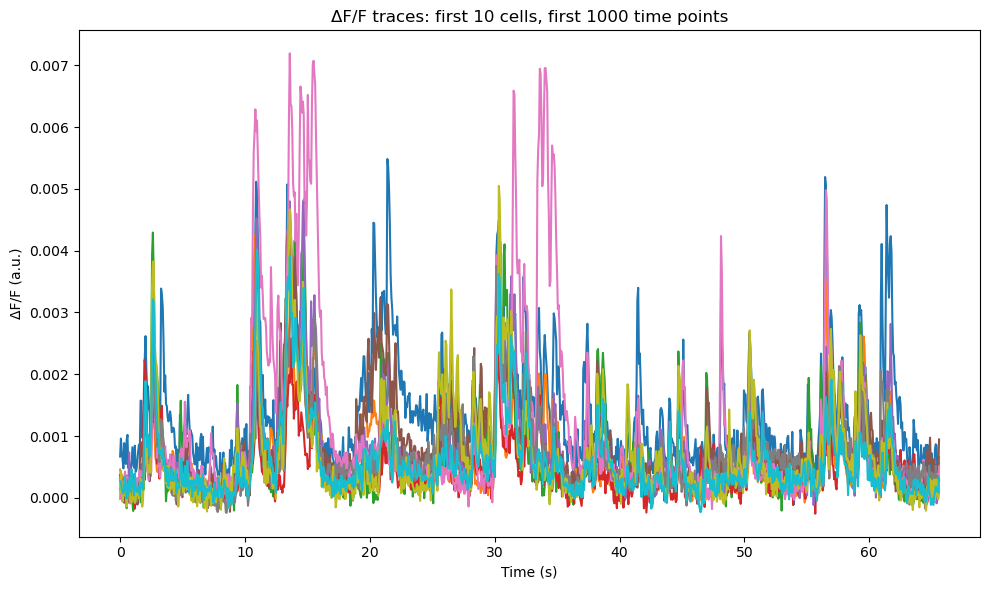

Data shape: (1000, 10) (time points × cells)


In [8]:
# Extract and plot ΔF/F traces for first 10 cells
dff = roi_response_series['dff_chn0']
dff_data = dff.data[:1000, :10]  # First 1000 time points, first 10 cells
rate = dff.rate

# Create time vector
t = np.arange(dff_data.shape[0]) / rate

# Plot traces
plt.figure(figsize=(10, 6))
for i in range(dff_data.shape[1]):
    plt.plot(t, dff_data[:, i], label=f'Cell {i+1}')

plt.xlabel('Time (s)')
plt.ylabel('ΔF/F (a.u.)')
plt.title('ΔF/F traces: first 10 cells, first 1000 time points')
plt.tight_layout()
plt.show()

print(f"Data shape: {dff_data.shape} (time points × cells)")

## Visualize Calcium Event Traces

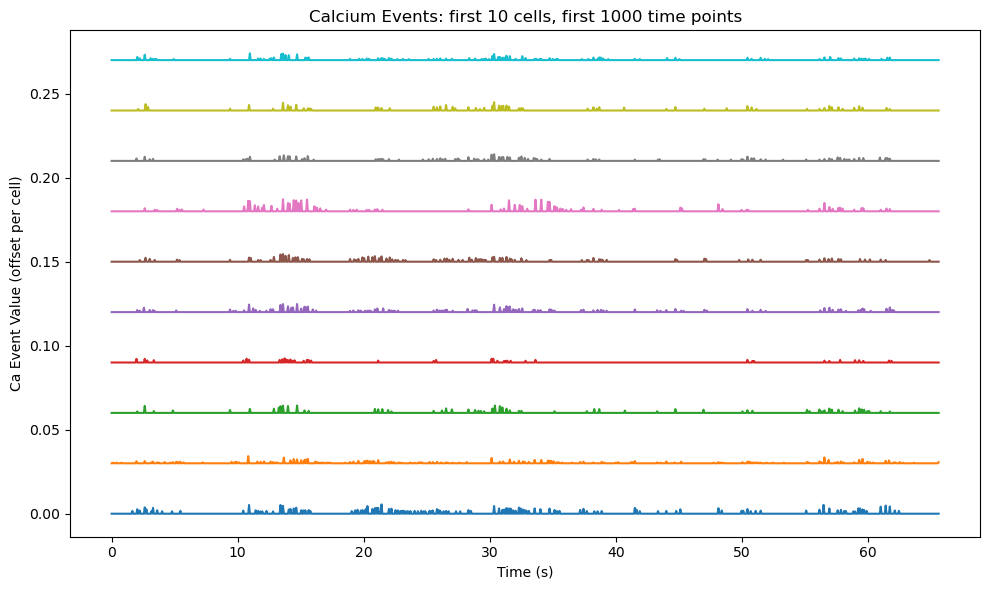

In [9]:
# Extract and plot calcium event traces
caev = roi_response_series['ca_events_chn0']
caev_data = caev.data[:1000, :10]  # First 1000 time points, first 10 cells

# Plot event traces with small vertical offset for clarity
plt.figure(figsize=(10, 6))
for i in range(caev_data.shape[1]):
    plt.plot(t, caev_data[:, i] + i*0.03, label=f'Cell {i+1}')

plt.xlabel('Time (s)')
plt.ylabel('Ca Event Value (offset per cell)')
plt.title('Calcium Events: first 10 cells, first 1000 time points')
plt.tight_layout()
plt.show()

The calcium event traces show discrete, event-like activity patterns derived from the fluorescence data. These processed signals are ideal for event rate analysis, synchronization studies, and population decoding approaches.

## Data Access Summary

### Key code patterns for data access:

```python
# Access different signal types
roi_resp = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series
dff = roi_resp['dff_chn0'].data           # ΔF/F traces
ca_events = roi_resp['ca_events_chn0'].data  # Calcium events
fluor = roi_resp['fluorescence_chn0'].data   # Raw fluorescence

# Get ROI segmentation info
seg = nwb.processing['ophys'].data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation_1']
num_cells = seg.id.data.shape[0]

# Access behavioral sync signals (check acquisition)
sync_signals = list(nwb.acquisition)  # May contain LED triggers
```

## Next Steps for Analysis

This notebook provides the foundation for exploring this developmental two-photon imaging dataset. Key analysis directions include:

- **Developmental dynamics**: Compare activity patterns across ages (P11-P21)
- **Population analysis**: Examine cell-cell correlations and network structure
- **Behavioral alignment**: Use LED sync signals to relate neural activity to behavior
- **Event analysis**: Study calcium event rates, timing, and population synchrony

The standardized NWB format allows these analysis approaches to be applied across all sessions and subjects in the dataset.